In [1]:
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from latex import set_size



plt.style.use("tex")
sns.set_palette("colorblind")

datadir = "../data/"
figdir = "../figures/"

beta = 2.287e-11

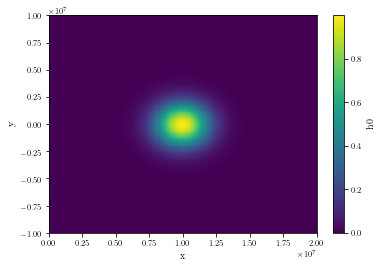

In [2]:
initial = xr.open_dataset(datadir + "H_init_cond.nc")
initial.h0.plot()

In [3]:
data = xr.open_dataset(datadir + "h_equatorial.nc")
data
R = np.sqrt(np.sqrt(9.81*1000)/beta)

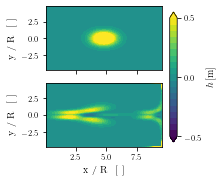

In [5]:
initial = data.isel(time=0)
final = data.isel(time=-1)

levels = np.linspace(-0.5, 0.5, 20)
levels1=[levels[0], 0, levels[-1]]

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=set_size(width=151, subplots=(2, 1)))

c = ax[1].contourf(final.x/R, final.y/R, final.h,
                levels=levels,
                extend="both"
               )
ax[1].set_ylabel(r"y / R $\,$ [ ]")
ax[0].contourf(initial.x/R, initial.y/R, initial.h,
                levels=levels,
                extend="both"
               )

cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
cb = fig.colorbar(c, ticks=levels1, cax=cbar_ax, label=r"$h \, $[m]")

ax[1].set_xlabel(r"x / R $\,$ [ ]")
ax[0].set_ylabel(r"y / R $\,$ [ ]")

#sns.despine(fig=fig)
#fig.tight_layout()
fig.savefig(figdir + "initialfinal_equatorial.pdf", format="pdf", bbox_inches="tight")

5.787037037037037
6.26418390534633


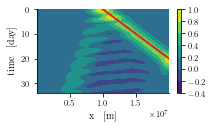

In [186]:
eq = data.sel(y=0, method="nearest")

def f(t):
    return 5.0e5*(t + 20)

print(5.0e5/24/60/60)
print(np.sqrt(9.81*4/1000*1000))

fig, ax = plt.subplots(1, 1, figsize=set_size(width=221))

c = ax.contourf(eq.x, eq.time/24, eq.h)
ax.plot(f(eq.time/24), eq.time/24,
        color="tab:red",
        linewidth=2
       )
ax.set_xlim(eq.x.min(), eq.x.max())
ax.invert_yaxis()
ax.set_xlabel(r"x $\,$ [m]")
ax.set_ylabel(r"time $\,$ [day]")

fig.colorbar(c)

sns.despine(fig=fig)
fig.tight_layout()
fig.savefig(figdir + "hovmuller_equatorial.pdf", format="pdf", bbox_inches="tight", dpi=600)

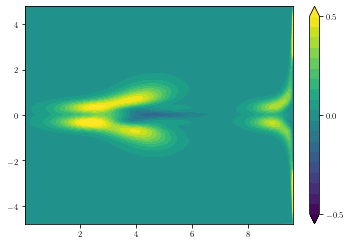

In [62]:
Nt = len(data.time)

x = data.x
y = data.y
z = data.h

levels = np.linspace(-0.5, 0.5, 20)
levels1=[levels[0], 0, levels[-1]]

fig, ax = plt.subplots(1, 1)
#ax.set_ylim(0, max(data.y)/4)

cont = plt.contourf(x/R, y/R, data.h.isel(time=0),
                    levels=levels,
                    #cmap=plt.get_cmap("coolwarm"),
                    extend="both"
                   )
plt.colorbar(ticks=levels1)

def animate(i):
    global cont
    z = data.h.isel(time=i)
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(x/R, y/R, z,
                        levels=levels,
                        #cmap=plt.get_cmap("coolwarm"),
                        extend="both"
                       )
    #plt.title('t = %i:  %.2f' % (i,z[5,5]))
    return cont

anim = animation.FuncAnimation(fig, animate, frames=Nt, repeat=True)
anim.save(figdir + "kelvin_equatorial.mp4", writer=animation.FFMpegWriter())